## Alumno : Rubén Álvarez Mosquera

---
# **Clasificación Binaria de la superviviencia en el Titanic**

*Prefacio : Nuestra tarea consiste en predecir la supewrvivencia o no de un pasajero en el Titanic*

---

## Declaración de módulos
---

En primer lugar, vamos a importar algunos módulos comunes. 

También comprobamos que Python 3.5 o posterior está instalado (aunque Python 2.x puede funcionar, está obsoleto por lo que es **altamente** recomendable utilizar Python 3 en su lugar), así como Scikit-Learn ≥0.20.

También agregaremos una librería (warnings) para evitar los molestos mensajes de advertencia(Futurewarnings).

In [167]:
# Se requiere Python ≥ 3.5
import sys
assert sys.version_info >= (3, 5)

# Se requiere Scikit-Learn ≥ 0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Otros imports
import numpy as np
import os

# Importamos la librería Pandas para administar Dataframes
import pandas as pd

# la línea que sigue, sólo en Colab ...
# %matplotlib inline
# Importamos librería MatPlotLib
import matplotlib as mpl
import matplotlib.pyplot as plt

# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=15)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)

# Importamos librería "Seaborn" para la visualización que es como un MatPlotLib con "esteriodes"
import seaborn as sns 


# Importa la librería que va a posibilitar evitar que salgan los molestos mensajes de advertencia
import warnings

Configuración de las Advertencias "Futurewarning"

In [168]:
# configuración para eviatar que aparezcan las advertencias "FutureWarnings"
warnings.filterwarnings("ignore", category=FutureWarning)

Configuración de las visualizaciones de "Seaborn"

In [169]:
# Configuramos visualizaciones con Seaborn
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## Importacion de Datos
---

Definimos la función que importará los datos de un archivo CSV a un Dataframe de Pandas

In [183]:
INSURANCE_PATH = os.path.join("dataset");

def load_insurance_data(insurance_path):
    csv_path = os.path.join(insurance_path, "tested.csv")
    return pd.read_csv(csv_path)

Llamamos a la función de importación de datos y los importamos a la variable "insurance"

In [184]:
titanic = load_insurance_data(INSURANCE_PATH)

Comprobamos el estado de los Datos, mediante una revisión de las primeras filas

In [185]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Comprobamos la información del Dataframe

In [186]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Comprobamos un resumen descriptivo general del Dataframe

In [187]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Revisamos el estado de los datos : Gestión de los valore Nulos
---

Comprobación del número de NaN por categoría

In [188]:
# De forma global
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Podemos ver como tenemos varios NaN repartidos
* Age 86
* Fare 1
* Cabin 327

In [189]:
titanic_backup = titanic.copy()

### EDAD

*En el caso de la edad (age), pondremos la media*

In [190]:
# Hallamos la media redondeada a años
media_age = round(titanic["Age"].mean(),0)
print("La media redondeada a años es: ", round(titanic["Age"].mean(),0))
# Localizamos el índice del NaN
lista_NaN_age = list(titanic.loc[pd.isna(titanic["Age"]), :].index)
print("Lista de los índices con NaN : ", list(titanic.loc[pd.isna(titanic["Age"]), :].index))
# Cambiamos el valor de los índice para la columna añoas por la media
for x in lista_NaN_age:
    titanic.loc[x,'Age']=media_age

#Revisamos resultados 
print("Después de los cambios, el número de los NaN en la columna 'age' es de : ", titanic["Age"].isna().sum())

La media redondeada a años es:  30.0
Lista de los índices con NaN :  [10, 22, 29, 33, 36, 39, 41, 47, 54, 58, 65, 76, 83, 84, 85, 88, 91, 93, 102, 107, 108, 111, 116, 121, 124, 127, 132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191, 199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255, 256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290, 292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366, 380, 382, 384, 408, 410, 413, 416, 417]
Después de los cambios, el número de los NaN en la columna 'age' es de :  0


### FARE

*En el caso de "Fare" pondremos igualmente la media*

In [191]:
# Hallamos la media redondeada de la tarifa
media_fare = round(titanic["Fare"].mean(),6)
print("La media de la tarifa es: ", round(titanic["Fare"].mean(),6))
# Localizamos el índice del NaN
lista_NaN_age = list(titanic.loc[pd.isna(titanic["Fare"]), :].index)
print("El índice con NaN es : ", list(titanic.loc[pd.isna(titanic["Fare"]), :].index))
# Cambiamos el valor NaN, para la columna "Fare" por la media
for x in lista_NaN_age:
    titanic.loc[x,'Fare']=media_fare

#Revisamos resultados 
print("Después de los cambios, el número de los NaN en la columna 'Fare'/tarifa es de : ", titanic["Fare"].isna().sum())

La media de la tarifa es:  35.627188
El índice con NaN es :  [152]
Después de los cambios, el número de los NaN en la columna 'Fare'/tarifa es de :  0


También revisaremos valores "0"

In [192]:
# Distribución de los números
titanic["Fare"].describe()

count    418.000000
mean      35.627188
std       55.840500
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

Podemos ver valores mínimos con "0.000000"

In [193]:
titanic["Fare"].value_counts()[0.000000]

2

Podemos ver que existen 2 valores con "0.000000"

Disponemos a adjudicarles la media

In [194]:
# Hallamos la media redondeada de la tarifa
media_fare = round(titanic["Fare"].mean(),6)
print("La media de la tarifa es: ", round(titanic["Fare"].mean(),6))
# Localizamos el índice del valor"0.000.000"
lista_zero = titanic.index[titanic["Fare"] == 0.000000].tolist()
print("los índices de los valores '0.000000' de la comlumna 'Fare' son : ", lista_zero)
# Cambiamos el valor "0.000000", para la columna "Fare" por la media
for x in lista_zero:
    titanic.loc[x,'Fare']=media_fare

La media de la tarifa es:  35.627188
los índices de los valores '0.000000' de la comlumna 'Fare' son :  [266, 372]


In [195]:
# Comprobamos el mínimo
titanic["Fare"].describe()

count    418.000000
mean      35.797654
std       55.785703
min        3.170800
25%        7.895800
50%       14.479150
75%       31.634400
max      512.329200
Name: Fare, dtype: float64

### CABIN

*En el caso de "Cabin" estudiaremos la columna más a fondo*

In [196]:
# número total de valores en la columna "Cabin"
len(titanic["Cabin"])

418

In [197]:
# Cantidad de NaN en la columna "Cabin"
titanic["Cabin"].isna().sum()

327

In [198]:
# Distribución de los números
titanic["Cabin"].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [199]:
# Detalle de los valores únicos de la columna "Cabin"
titanic["Cabin"].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

Podemos observar que :
- el Total de valores = 418
- el total de NaN     = 327
- el total no-NaN     =  91

En este caso lo vamos a dividir entre cubiertas y Desconocido
- En el caso de las cubiertas designaremos las Letras : "A","B","C", etc...
- En el caso del Desconocido pondremos la letra "U" de Unknown

In [200]:
# Localizamos el índice del NaN
lista_NaN_age = list(titanic.loc[pd.isna(titanic["Cabin"]), :].index)
# Cambiamos el valor NaN, y ás si los hubiera para la columna "Cabin" por la letra "U"
for x in lista_NaN_age:
    titanic.loc[x,'Cabin']="U"
# Cambiamos el valor de la columna "Cabin" por el primer caracter 
for x in range(len(titanic["Cabin"])):
    titanic.loc[x,"Cabin"]= titanic.loc[x,"Cabin"][0]

#Revisamos resultados 
print("Después de los cambios, el número de los NaN en la columna 'Cabin'es de : ", titanic["Fare"].isna().sum())

Después de los cambios, el número de los NaN en la columna 'Cabin'es de :  0


In [201]:
# Revisamos como ha quedado distribuida la columna "Cabin"
titanic["Cabin"].value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

In [202]:
# Revisamos de nuevo los NaN de forma global
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Hemos conseguido el objetivo de eliminar los valores "NaN"

### Ahora revisaremos si hay valores no-NaN, pero con "0" en sus valores en otras columnas

In [203]:
titanic["Age"].describe()

count    418.000000
mean      30.216507
std       12.635016
min        0.170000
25%       23.000000
50%       30.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64

En este caso podemos pensar que la edad tan baja sea posible por ser recien nacidos a bordo

---

## Revisión y tratamiento de las columnas categorizadas : Sex, Cabin, Embarked, Pclass
---


Revisaremos las tres categorías, agregando la columna a una variable que usaremos posteriormente, y revisaremos el tipo de las categorías y sus valores

### Sex

In [204]:
# agregamos la columna a una variable
cat_sexo = titanic[ ["Sex"] ]

# Revisamos el contenido de la columna
titanic["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

### Cabin

In [205]:
# agregamos la columna a una variable
cat_cabin = titanic[ ["Cabin"] ]

# Revisamos el contenido de la columna
titanic["Cabin"].value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

### Embarked

In [206]:
# agregamos la columna a una variable
cat_embar = titanic[ ["Embarked"] ]

# Revisamos el contenido de la columna
titanic["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

### Embarked

In [207]:
# agregamos la columna a una variable
cat_pclass = titanic[ ["Pclass"] ]

# Revisamos el contenido de la columna
titanic["Pclass"].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

Podemos observar que son columnas categarizadas, que para el entrenamiento no pueden existir, por lo que necesitamos pasar de columnas categorizadas a otro tipo de expresión como por ejemplo a la división de las categorías en nuevas columnas y poniendo un 0 cuando no se cumpla la condición de la categoría y un "1" cuando sí.

De esta forma no estaremos añadiendo información al Dataset, y nos permitirá el estudio y el entrenamiento del modelo.

## Uso de OneHotEncoder para la gestión de las cloumnas categorizadas
---

OneHotencoder nos permitirá pasar las categorías a diferentes columnas por valor de categoría y agregarle "0" y "1" en cada caso.

Ante de nada realizaremos un Backup de los datos por si necesitáramos volver al estado anterior

In [208]:
# Haremos una copia para ver los resultados 
insurance_backup = titanic.copy()

Crearemos una nueva variable con el Dataframe Normalizado llamdo "titanic_norm"

In [209]:
titanic_norm = titanic.copy()

Llamamos a la librería "OneHotEncoder" de Sklearn

In [210]:
# Declaramos la librería OneHotEncoder de sklearn
from sklearn.preprocessing import OneHotEncoder

Usamos el método con cada una de las columnas categóricas, empezando por


### SEXO

In [211]:
sexo_encoder =OneHotEncoder(sparse=False)
# para la categoria Sexo (male/female)
sexo_cat_1hot = sexo_encoder.fit_transform(cat_sexo)

sexo_cat_1hot

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [212]:
# Aquí tendremos los nombre de las categorías
sexo_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [213]:
# Ahora sustituiremos la columna Sexo , por las de OneHotEncoder
titanic_norm.reset_index(drop=False, inplace=True)
titanic_norm=titanic_norm.join(pd.DataFrame(sexo_cat_1hot, columns=[cat for cat in sexo_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
titanic_norm=titanic_norm.drop(["Sex","index"], axis=1)
# Mostramos el resultado
titanic_norm.info()
titanic_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  female       418 non-null    float64
 12  male         418 non-null    float64
dtypes: float64(4), int64(5), object(4)
memory usage: 42.6+ KB


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,U,Q,0.0,1.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,U,S,1.0,0.0
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,U,Q,0.0,1.0
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,U,S,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,U,S,1.0,0.0


### CABIN

In [214]:
cabin_encoder =OneHotEncoder(sparse=False)
# para la categoria Sexo (male/female)
cabin_cat_1hot = cabin_encoder.fit_transform(cat_cabin)

# Ahora sustituiremos la columna Sexo , por las de OneHotEncoder
titanic_norm.reset_index(drop=False, inplace=True)
titanic_norm=titanic_norm.join(pd.DataFrame(cabin_cat_1hot, columns=[cat for cat in cabin_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
titanic_norm=titanic_norm.drop(["Cabin","index"], axis=1)
# Mostramos el resultado
titanic_norm.info()
titanic_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  female       418 non-null    float64
 11  male         418 non-null    float64
 12  A            418 non-null    float64
 13  B            418 non-null    float64
 14  C            418 non-null    float64
 15  D            418 non-null    float64
 16  E            418 non-null    float64
 17  F            418 non-null    float64
 18  G            418 non-null    float64
 19  U       

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,A,B,C,D,E,F,G,U
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Q,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Q,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,S,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [215]:
# Cambiamos el nombre d elas columnas para entenderlo mejor
titanic_norm=titanic_norm.rename(columns={"A":"Cabin A"});
titanic_norm=titanic_norm.rename(columns={"B":"Cabin B"});
titanic_norm=titanic_norm.rename(columns={"C":"Cabin C"});
titanic_norm=titanic_norm.rename(columns={"D":"Cabin D"});
titanic_norm=titanic_norm.rename(columns={"E":"Cabin E"});
titanic_norm=titanic_norm.rename(columns={"F":"Cabin F"});
titanic_norm=titanic_norm.rename(columns={"G":"Cabin G"});
titanic_norm=titanic_norm.rename(columns={"U":"Cabin U"});

# Revisamos cambios 
titanic_norm.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin U
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Q,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Q,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,S,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### EMBARKED

In [216]:
embar_encoder =OneHotEncoder(sparse=False)
# para la categoria Sexo (male/female)
embar_cat_1hot = embar_encoder.fit_transform(cat_embar)

# Ahora sustituiremos la columna Sexo , por las de OneHotEncoder
titanic_norm.reset_index(drop=False, inplace=True)
titanic_norm=titanic_norm.join(pd.DataFrame(embar_cat_1hot, columns=[cat for cat in embar_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
titanic_norm=titanic_norm.drop(["Embarked","index"], axis=1)
# Mostramos el resultado
titanic_norm.info()
titanic_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   female       418 non-null    float64
 10  male         418 non-null    float64
 11  Cabin A      418 non-null    float64
 12  Cabin B      418 non-null    float64
 13  Cabin C      418 non-null    float64
 14  Cabin D      418 non-null    float64
 15  Cabin E      418 non-null    float64
 16  Cabin F      418 non-null    float64
 17  Cabin G      418 non-null    float64
 18  Cabin U      418 non-null    float64
 19  C       

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,female,...,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin U,C,Q,S
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [217]:
# Cambiamos el nombre d elas columnas para entenderlo mejor
titanic_norm=titanic_norm.rename(columns={"C":"Embarked C"});
titanic_norm=titanic_norm.rename(columns={"Q":"Embarked Q"});
titanic_norm=titanic_norm.rename(columns={"S":"Embarked S"});

# Revisamos cambios 
titanic_norm.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,female,...,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin U,Embarked C,Embarked Q,Embarked S
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Pclass

In [218]:
pclass_encoder =OneHotEncoder(sparse=False)
# para la categoria Sexo (male/female)
pclass_cat_1hot = pclass_encoder.fit_transform(cat_pclass)

# Ahora sustituiremos la columna Sexo , por las de OneHotEncoder
titanic_norm.reset_index(drop=False, inplace=True)
titanic_norm=titanic_norm.join(pd.DataFrame(pclass_cat_1hot, columns=[cat for cat in pclass_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
titanic_norm=titanic_norm.drop(["Pclass","index"], axis=1)
# Mostramos el resultado
titanic_norm.info()
titanic_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   female       418 non-null    float64
 9   male         418 non-null    float64
 10  Cabin A      418 non-null    float64
 11  Cabin B      418 non-null    float64
 12  Cabin C      418 non-null    float64
 13  Cabin D      418 non-null    float64
 14  Cabin E      418 non-null    float64
 15  Cabin F      418 non-null    float64
 16  Cabin G      418 non-null    float64
 17  Cabin U      418 non-null    float64
 18  Embarked C   418 non-null    float64
 19  Embarked

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,female,male,...,Cabin E,Cabin F,Cabin G,Cabin U,Embarked C,Embarked Q,Embarked S,1,2,3
0,892,0,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,894,0,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,895,0,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [219]:
# Cambiamos el nombre d elas columnas para entenderlo mejor
titanic_norm=titanic_norm.rename(columns={1:"FirstClass"});
titanic_norm=titanic_norm.rename(columns={2:"SecondClass"});
titanic_norm=titanic_norm.rename(columns={3:"ThirdClass"});

# Revisamos cambios 
titanic_norm.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,female,male,...,Cabin E,Cabin F,Cabin G,Cabin U,Embarked C,Embarked Q,Embarked S,FirstClass,SecondClass,ThirdClass
0,892,0,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,894,0,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,895,0,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


## Eliminación de las columnas que no contienen información válida para la modelización de la predicción
---

### Columnas que eliminaremos para preparar el dataset:
- Eliminaremos la columna "PassengerId" ya que únicamente nos indica el "ID" del pasajero, y esto no es una dato valioso para la creación del modelo de predicción , e incluso es contraproducente que esté dentro de los datos a la hora de crearlo
- Así también lo haremos con la columna "Name" ya que no es un dato necesario 
- Procederemos igual con la columna "Ticket"

In [220]:
# Eliminación de la columna "PassegerID"
titanic_norm.drop(["PassengerId"],axis=1, inplace=True)

In [221]:
# Eliminación de la columna "Name"
titanic_norm.drop(["Name"],axis=1, inplace=True)

In [222]:
# Eliminación de la columna "Name"
titanic_norm.drop(["Ticket"],axis=1, inplace=True)

In [223]:
# Revisamos cambios 
titanic_norm.head()

,Survived,Age,SibSp,Parch,Fare,female,male,Cabin A,Cabin B,Cabin C,...,Cabin E,Cabin F,Cabin G,Cabin U,Embarked C,Embarked Q,Embarked S,FirstClass,SecondClass,ThirdClass
0,0,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [226]:
titanic_norm["Parch"].describe()

count    418.000000
mean       0.392344
std        0.981429
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        9.000000
Name: Parch, dtype: float64

## Revisión de los histogramas de las columnas
---

Realizamos una visualización de los histogramas de los datos, que representan el número de veces que un valor aparece, representando la distribución de los casos por categoría para tener una idea de su cantidad, dispersión ,etc...

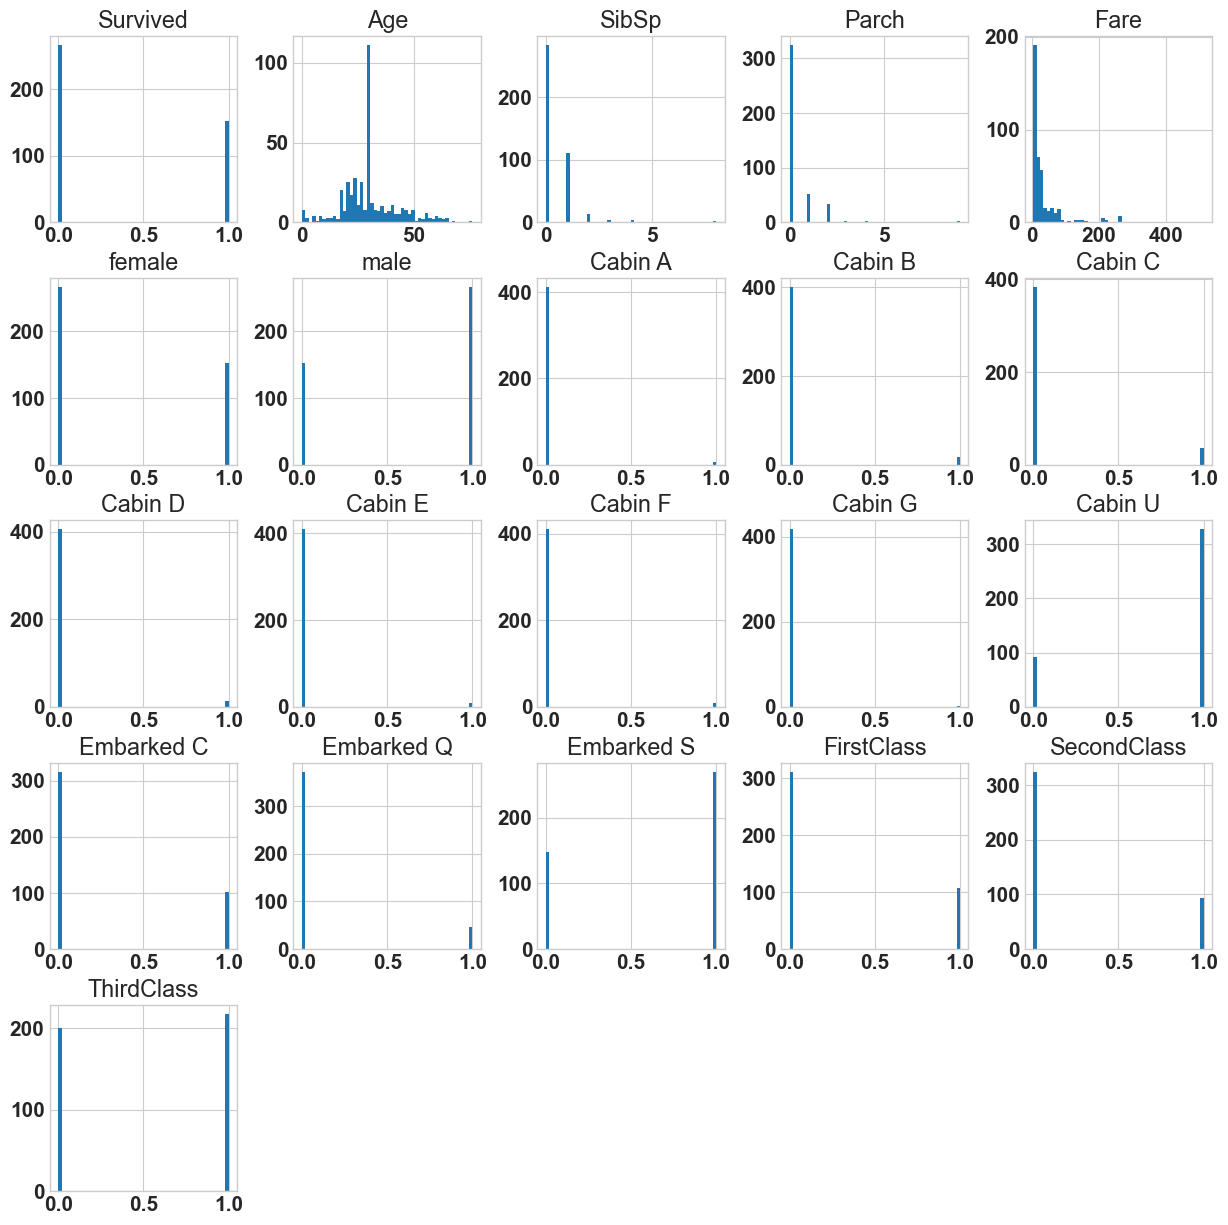

In [225]:
titanic_norm.hist(bins=50, figsize =(15,15))
plt.show()

Los histogramas tienen un buen comportamiento con valores discretas, pero no tanto con las categóricas binarias/booleanas, que apenas nos arrojan datos, a parte de su distribución por categorías

De todas formas, podemos ver que:
- Edad : Hay una gran concentración de muestras en edades de 18 a 20 años
- BMI(Índice de Masa Corporal) : Tiene una dispersión normal (Campana de Gauss)
- Hijos : Existen más concentración de muestras cuantos menos hijos, siendo "0" la mayor de ellas
- Cargos : Hay una gran concentración de muestras en las más bajas hasta 15.000
- Sexo : Igual número (aproximado) de hombre y mujeres
- Fumadores : Mucha más concentración de NO fumadores ( casi tres veces más )
- Región : Aproximadamente numero igual de muestras en cada region

## Estudio numérico de la correlación entre los datos para obtener información relevante
---

### Buscando correlaciones

Aquí nos damos cuenta de la necesidad de la normalización del modelo para que las correlaciones puedan ser medidas

In [229]:
corr_matrix = titanic_norm.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
female         1.000000
Fare           0.189258
Parch          0.159120
FirstClass     0.126389
Embarked Q     0.115574
Cabin C        0.112625
SibSp          0.099943
Cabin G        0.064781
Cabin B        0.060134
Embarked C     0.033684
Cabin E        0.024919
Cabin A        0.017617
Cabin D        0.007813
Cabin F        0.003300
Age            0.000662
SecondClass   -0.045655
ThirdClass    -0.072405
Embarked S    -0.105883
Cabin U       -0.131464
male          -1.000000
Name: Survived, dtype: float64

In [230]:
corr_matrix

,Survived,Age,SibSp,Parch,Fare,female,male,Cabin A,Cabin B,Cabin C,...,Cabin E,Cabin F,Cabin G,Cabin U,Embarked C,Embarked Q,Embarked S,FirstClass,SecondClass,ThirdClass
Survived,1.000000,0.000662,0.099943,0.159120,0.189258,1.000000,-1.000000,0.017617,0.060134,0.112625,...,0.024919,0.003300,0.064781,-0.131464,0.033684,0.115574,-0.105883,0.126389,-0.045655,-0.072405
Age,0.000662,1.000000,-0.078870,-0.044980,0.331003,0.000662,-0.000662,0.132197,0.169123,0.275761,...,0.082349,-0.065350,-0.113372,-0.360502,0.161724,-0.015119,-0.135353,0.454726,-0.058211,-0.348797
SibSp,0.099943,-0.078870,1.000000,0.306895,0.170128,0.099943,-0.099943,-0.023554,0.051938,0.099729,...,-0.000484,-0.030780,0.030214,-0.073067,-0.016365,-0.098824,0.079367,0.019166,-0.042418,0.018573
Parch,0.159120,-0.044980,0.306895,1.000000,0.229003,0.159120,-0.159120,-0.014196,0.107455,-0.024072,...,0.041513,0.015341,0.030356,-0.037237,-0.005791,-0.132948,0.092201,-0.005485,-0.026335,0.026719
Fare,0.189258,0.331003,0.170128,0.229003,1.000000,0.189258,-0.189258,0.020890,0.425431,0.462438,...,0.130783,-0.046935,-0.016785,-0.563299,0.310609,-0.156767,-0.176375,0.622663,-0.130525,-0.435303
female,1.000000,0.000662,0.099943,0.159120,0.189258,1.000000,-1.000000,0.017617,0.060134,0.112625,...,0.024919,0.003300,0.064781,-0.131464,0.033684,0.115574,-0.105883,0.126389,-0.045655,-0.072405
male,-1.000000,-0.000662,-0.099943,-0.159120,-0.189258,-1.000000,1.000000,-0.017617,-0.060134,-0.112625,...,-0.024919,-0.003300,-0.064781,0.131464,-0.033684,-0.115574,0.105883,-0.126389,0.045655,0.072405
Cabin A,0.017617,0.132197,-0.023554,-0.014196,0.020890,0.017617,-0.017617,1.000000,-0.027684,-0.039451,...,-0.019359,-0.018230,-0.006391,-0.247390,0.099484,-0.045892,-0.059316,0.222493,-0.069812,-0.136252
Cabin B,0.060134,0.169123,0.051938,0.107455,0.425431,0.060134,-0.060134,-0.027684,1.000000,-0.064127,...,-0.031468,-0.029632,-0.010388,-0.402123,0.153868,-0.074596,-0.089376,0.361655,-0.113477,-0.221472
Cabin C,0.112625,0.275761,0.099729,-0.024072,0.462438,0.112625,-0.112625,-0.039451,-0.064127,1.000000,...,-0.044843,-0.042227,-0.014804,-0.573044,0.230440,-0.078703,-0.155459,0.515375,-0.161709,-0.315608


<AxesSubplot:>

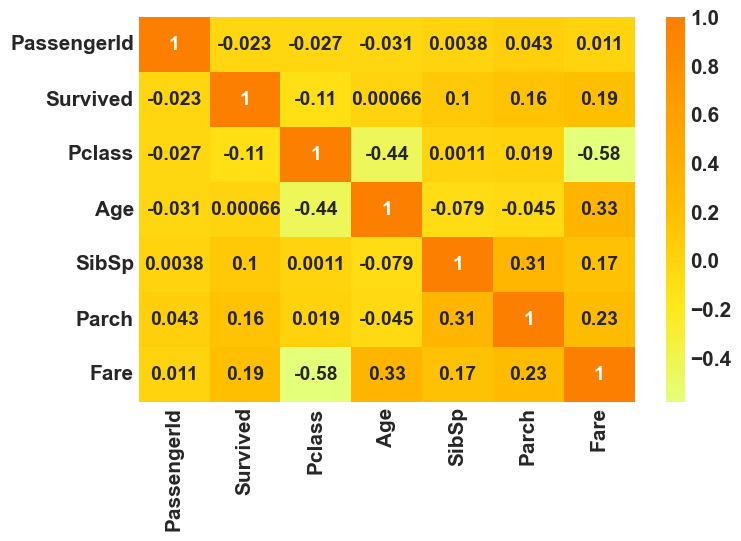

In [231]:
plt.rcParams['font.size'] =14
corr = titanic.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

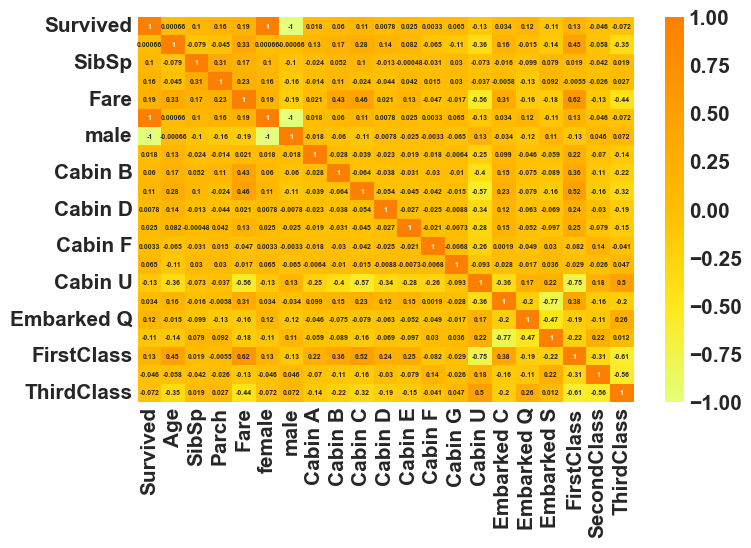

In [236]:
corr_norm = titanic_norm.corr()
# Reduciremos el tamaño de fuente para este gráfico (y lo volveremos a dejar como estaba) por el tamaño de celdas
plt.rcParams['font.size'] =5
sns.heatmap(corr_norm, cmap = 'Wistia', annot= True)
plt.rcParams['font.size'] =14

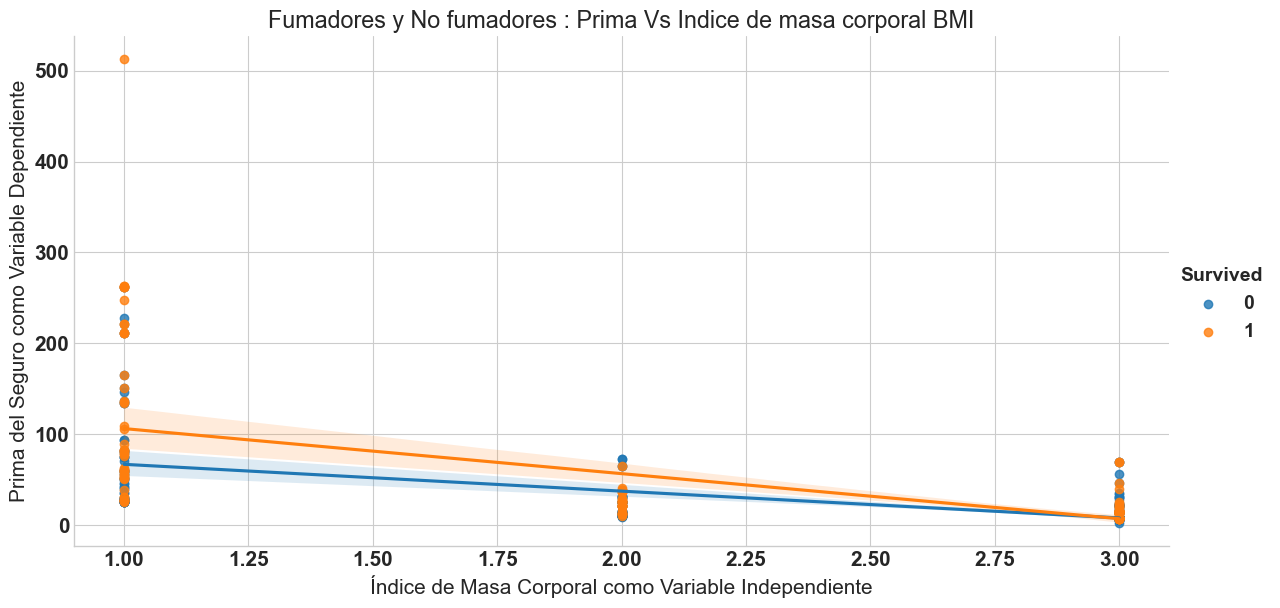

In [239]:
sns.lmplot(x='Pclass',y='Fare',hue='Survived',data=titanic,aspect=2,height=6)
plt.xlabel('Índice de Masa Corporal como Variable Independiente')
plt.ylabel('Prima del Seguro como Variable Dependiente')
plt.title('Fumadores y No fumadores : Prima Vs Indice de masa corporal BMI');

Text(0.5, 1.0, 'Distribución de la Prima VS Región')

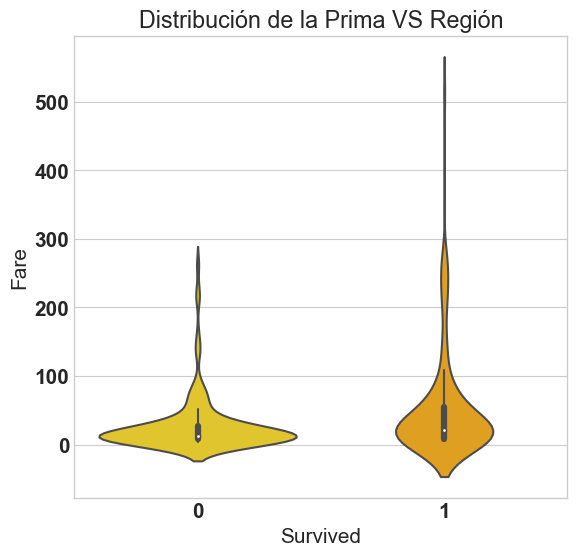

In [241]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.violinplot(x='Survived', y='Fare',data=titanic,palette='Wistia',ax=ax)
ax.set_title('Distribución de la Prima VS Región')

Text(0.5, 1.0, 'Distribución de la Prima VS Región')

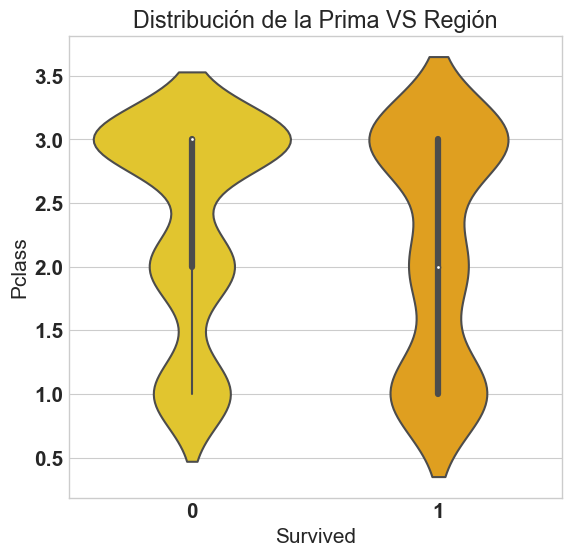

In [242]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.violinplot(x='Survived', y='Pclass',data=titanic,palette='Wistia',ax=ax)
ax.set_title('Distribución de la Prima VS Región')

Text(0.5, 1.0, 'Distribución de la Prima VS Región')

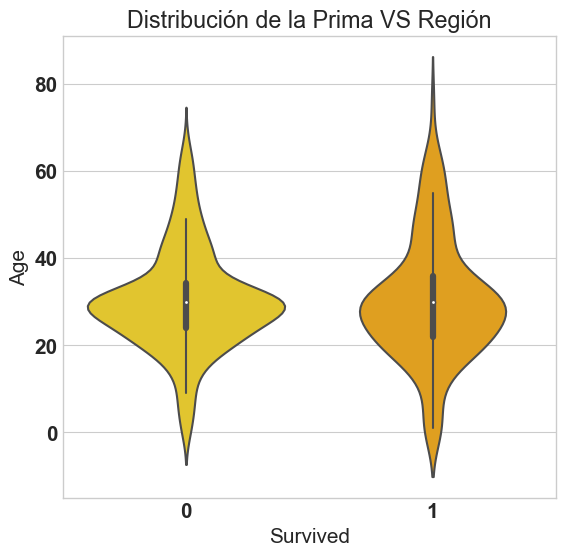

In [243]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.violinplot(x='Survived', y='Age',data=titanic,palette='Wistia',ax=ax)
ax.set_title('Distribución de la Prima VS Región')

Text(0.5, 1.0, 'Distribución de la Prima VS Región')

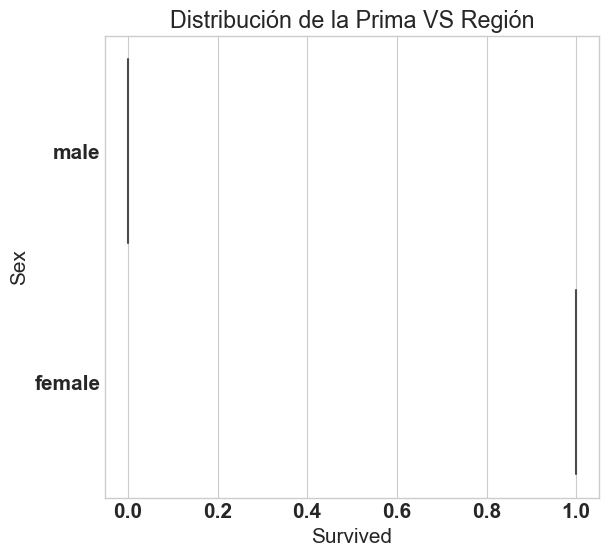

In [244]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.violinplot(x='Survived', y='Sex',data=titanic,palette='Wistia',ax=ax)
ax.set_title('Distribución de la Prima VS Región')